In [44]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedKFold

from utils.metrics import aucroc
from utils.curves import learning_curve
from utils.estimators import LDAWrapper
from utils.base_set import X_train, y_train, seed

### LDA

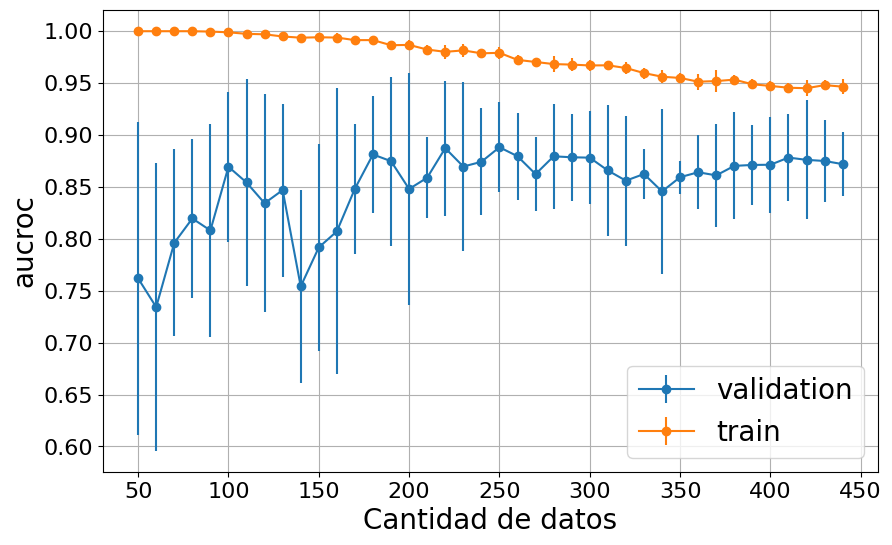

In [45]:
best_params = {'shrinkage': 0.2700067367383665, 'solver': 'eigen'} # based on ej. 3 y 4
k = 5
n = X_train.shape[0]
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=seed)
fig, ax = plt.subplots(figsize=(10, 6))
train = range(50, n, 10)
mean_val_scores, std_val_scores, _, _ = learning_curve(LDAWrapper(**best_params),
                 train,
                 X_train,
                 y_train,
                 aucroc,
                 True,
                 cv,
                 ax)
ax.legend(fontsize=20, loc='lower right')
ax.set_xlabel('Cantidad de datos', fontsize=20)
ax.set_ylabel('aucroc', fontsize=20)
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)
ax.grid(True)

In [46]:
maxidx = np.argmax(mean_val_scores)
train[maxidx]
mean_val_scores[maxidx]

0.8882352941176471

In [47]:
np.mean(mean_val_scores[17:])
np.mean(std_val_scores[17:])

0.047523984307768066